### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Apr 10th at 11.59pm CST
---

## Only one problem this week

This is a regression problem. Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

**1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.**


**2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?**


**3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.**

In [ ]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [ ]:
# To turn off interactive plotting
%matplotlib inline

**4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:**
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
**What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)**


**5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?**


**6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)**


**7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?**


8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

# Solutions

In [2]:
# IMPORTS 
##########
##########

import numpy as np
import matplotlib.pyplot as plt

### Part 1

In [3]:
#CLD reading in the data
placeholder = np.load('../../../coursework/homeworks/hw_data/hw7_data_1.npy')

In [7]:
X = placeholder[:,:2]
y = placeholder[:,2]
yerr = placeholder[:,3]
print(X.shape)

(500, 2)


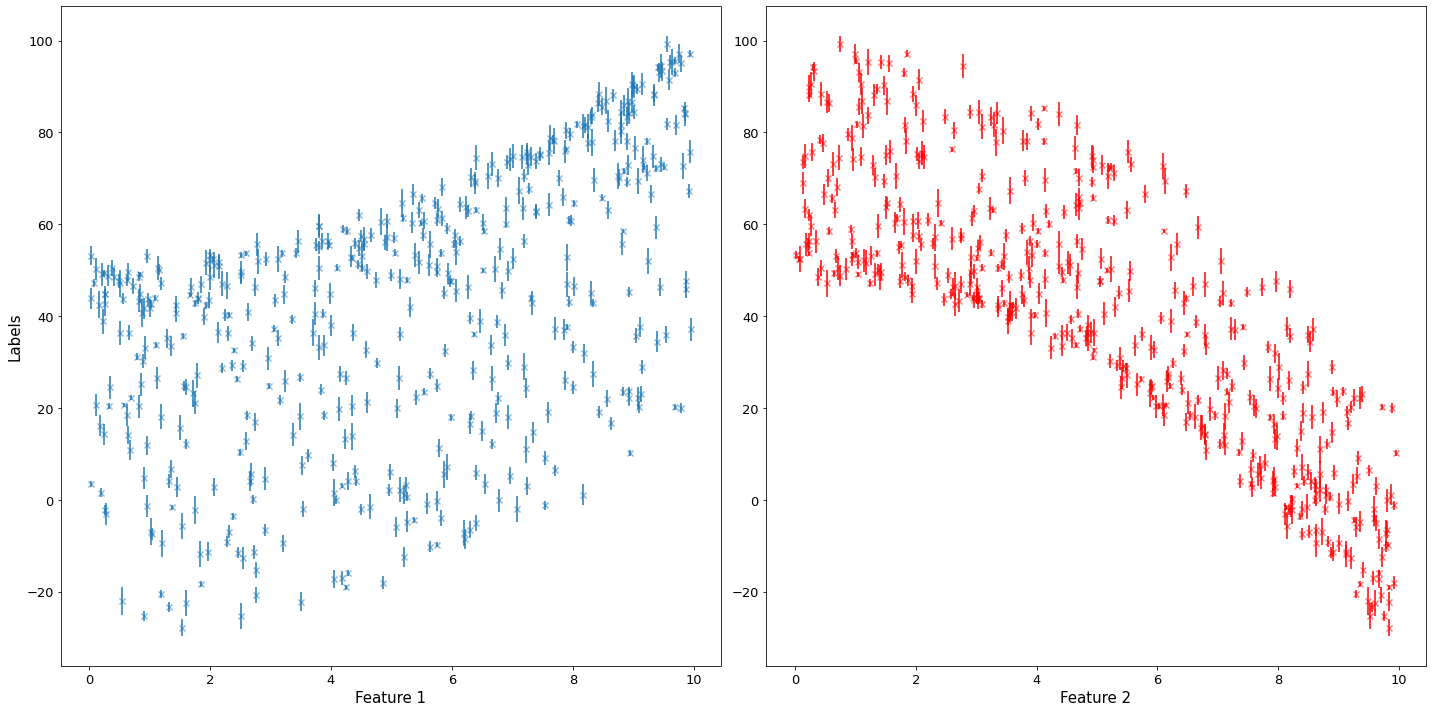

In [21]:
#CLD making the 2d scatter plot
fig,ax = plt.subplots(1,2, figsize=(20,10))
ax[0].scatter(X[:,0], y, marker='x', alpha=0.5)
ax[0].errorbar(X[:,0], y, yerr=yerr, fmt='none')
ax[1].scatter(X[:,1], y, marker='x', c='r', alpha=0.5)
ax[1].errorbar(X[:,1], y, yerr=yerr, c='r', fmt='none')
ax[0].set_xlabel('Feature 1', fontsize=15)
ax[1].set_xlabel('Feature 2', fontsize=15)
ax[0].set_ylabel('Labels', fontsize=15)
ax[0].tick_params(labelsize=13)
ax[1].tick_params(labelsize=13)
fig.tight_layout()
plt.show(fig);

### Part 2

In [22]:
#CLD importing the needed astroML function
from astroML.linear_model import LinearRegression

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [24]:
multi_lin = LinearRegression()
multi_lin.fit(X, y, yerr)
print(multi_lin.coef_)

[57.10102323  4.94873016 -8.30023407]


In [263]:
#CLD making the xgrids
xgrid1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 50)
xgrid2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 50)

In [264]:
#CLD feeding the xgrid to the model using the predict function to get the predicted labels
yfit1 = multi_lin.coef_[0] + multi_lin.coef_[1]*xgrid1
yfit2 = multi_lin.coef_[0] + multi_lin.coef_[2]*xgrid2

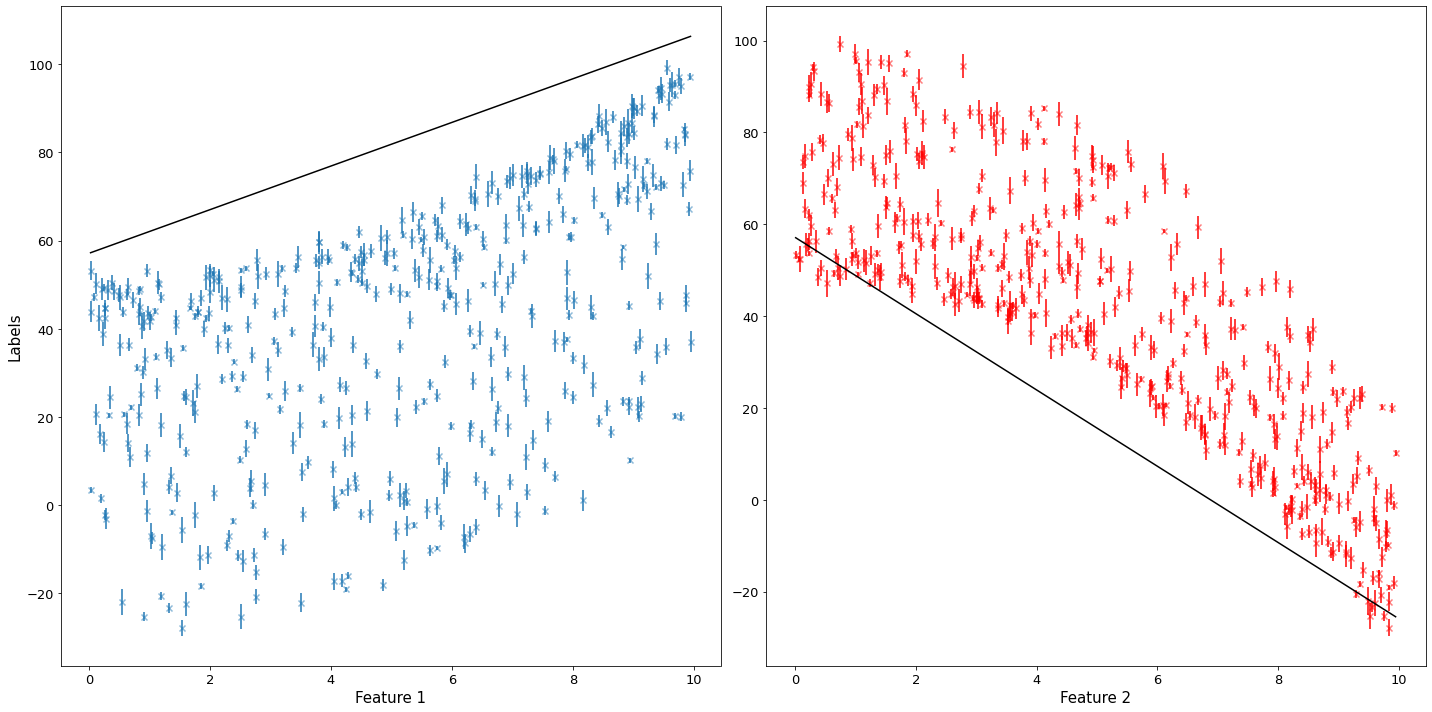

In [265]:
#CLD plotting the predicted labels on the same 2 panel scatter plot
fig,ax = plt.subplots(1,2, figsize=(20,10))
ax[0].scatter(X[:,0], y, marker='x', alpha=0.5)
ax[0].errorbar(X[:,0], y, yerr=yerr, fmt='none')
ax[0].plot(xgrid[:,0], yfit1, c='k')
ax[1].scatter(X[:,1], y, marker='x', c='r', alpha=0.5)
ax[1].errorbar(X[:,1], y, yerr=yerr, c='r', fmt='none')
ax[1].plot(xgrid[:,1], yfit2, c='k')
ax[0].set_xlabel('Feature 1', fontsize=15)
ax[1].set_xlabel('Feature 2', fontsize=15)
ax[0].set_ylabel('Labels', fontsize=15)
ax[0].tick_params(labelsize=13)
ax[1].tick_params(labelsize=13)
fig.tight_layout()
plt.show(fig);

This looks like a horrible description of the data.

### Part 3

In [254]:
#CLD making the meshgrid
xx1, xx2 = np.meshgrid(xgrid1, xgrid2)
Xgrid = np.array([xx1.flatten(), xx2.flatten()]).T
print(Xgrid.shape)

(2500, 2)


In [266]:
ypred= multi_lin.predict(Xgrid)

<IPython.core.display.Javascript object>


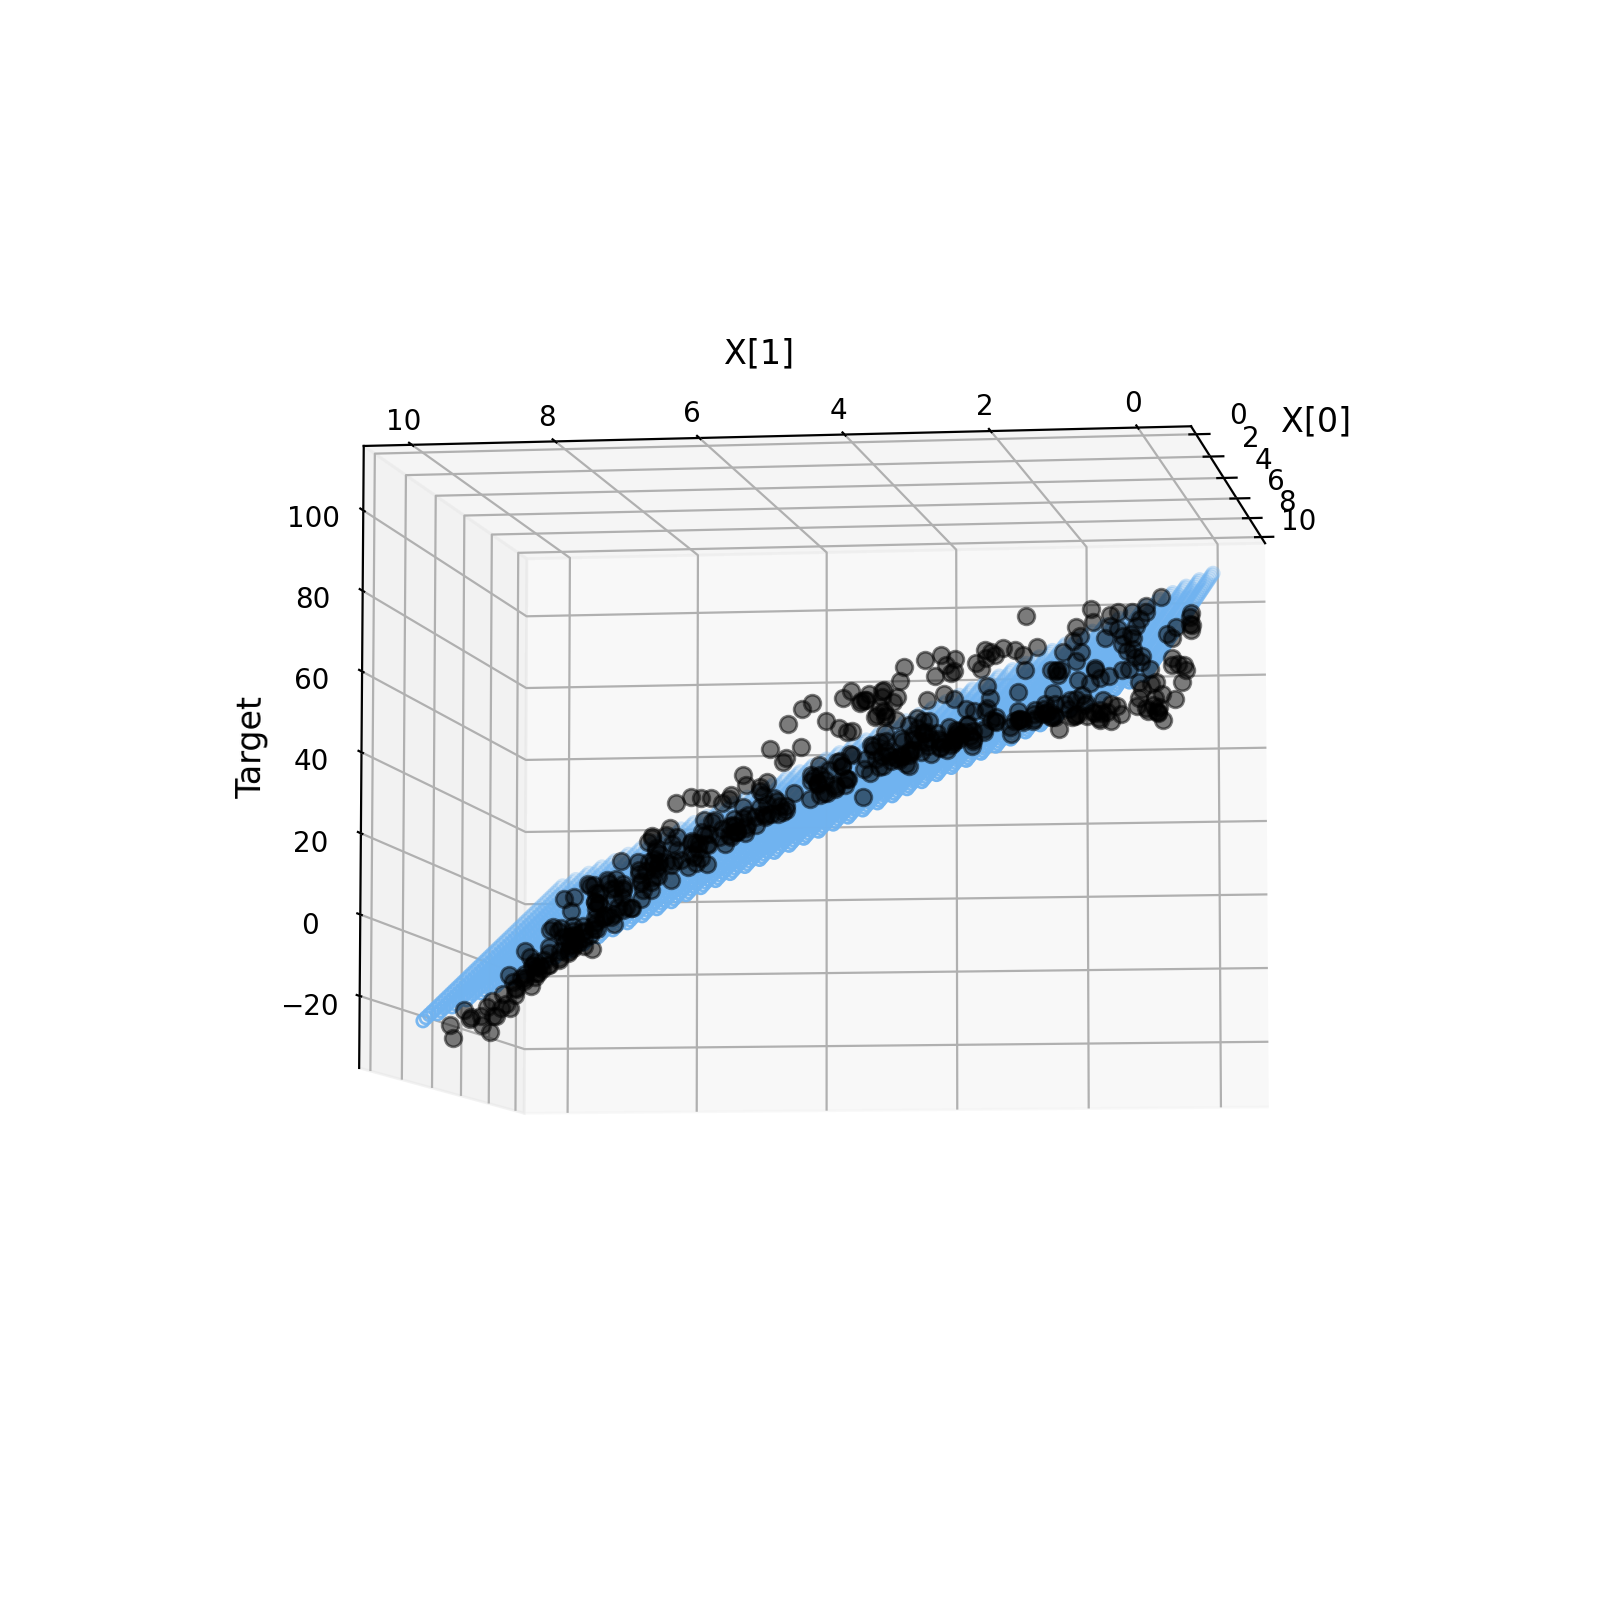

In [267]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), ypred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [268]:
# To turn off interactive plotting
%matplotlib inline

### Part 4

In [51]:
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}

In [57]:
#CLD importing the needed functions
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [58]:
#CLD starting the gridsearch model?
gridsearch = GridSearchCV(Ridge(), ridge_params)

In [90]:
gridsearch.fit(X,y,sample_weight=1/yerr**2)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'alpha': 1.0, 'solver': 'lsqr'}
0.929182742615996


In [91]:
ridge = Ridge(alpha=1, solver='lsqr')

In [269]:
ridge.fit(X,y,sample_weight=1/yerr**2)
ridge_ypred = ridge.predict(Xgrid)

<IPython.core.display.Javascript object>


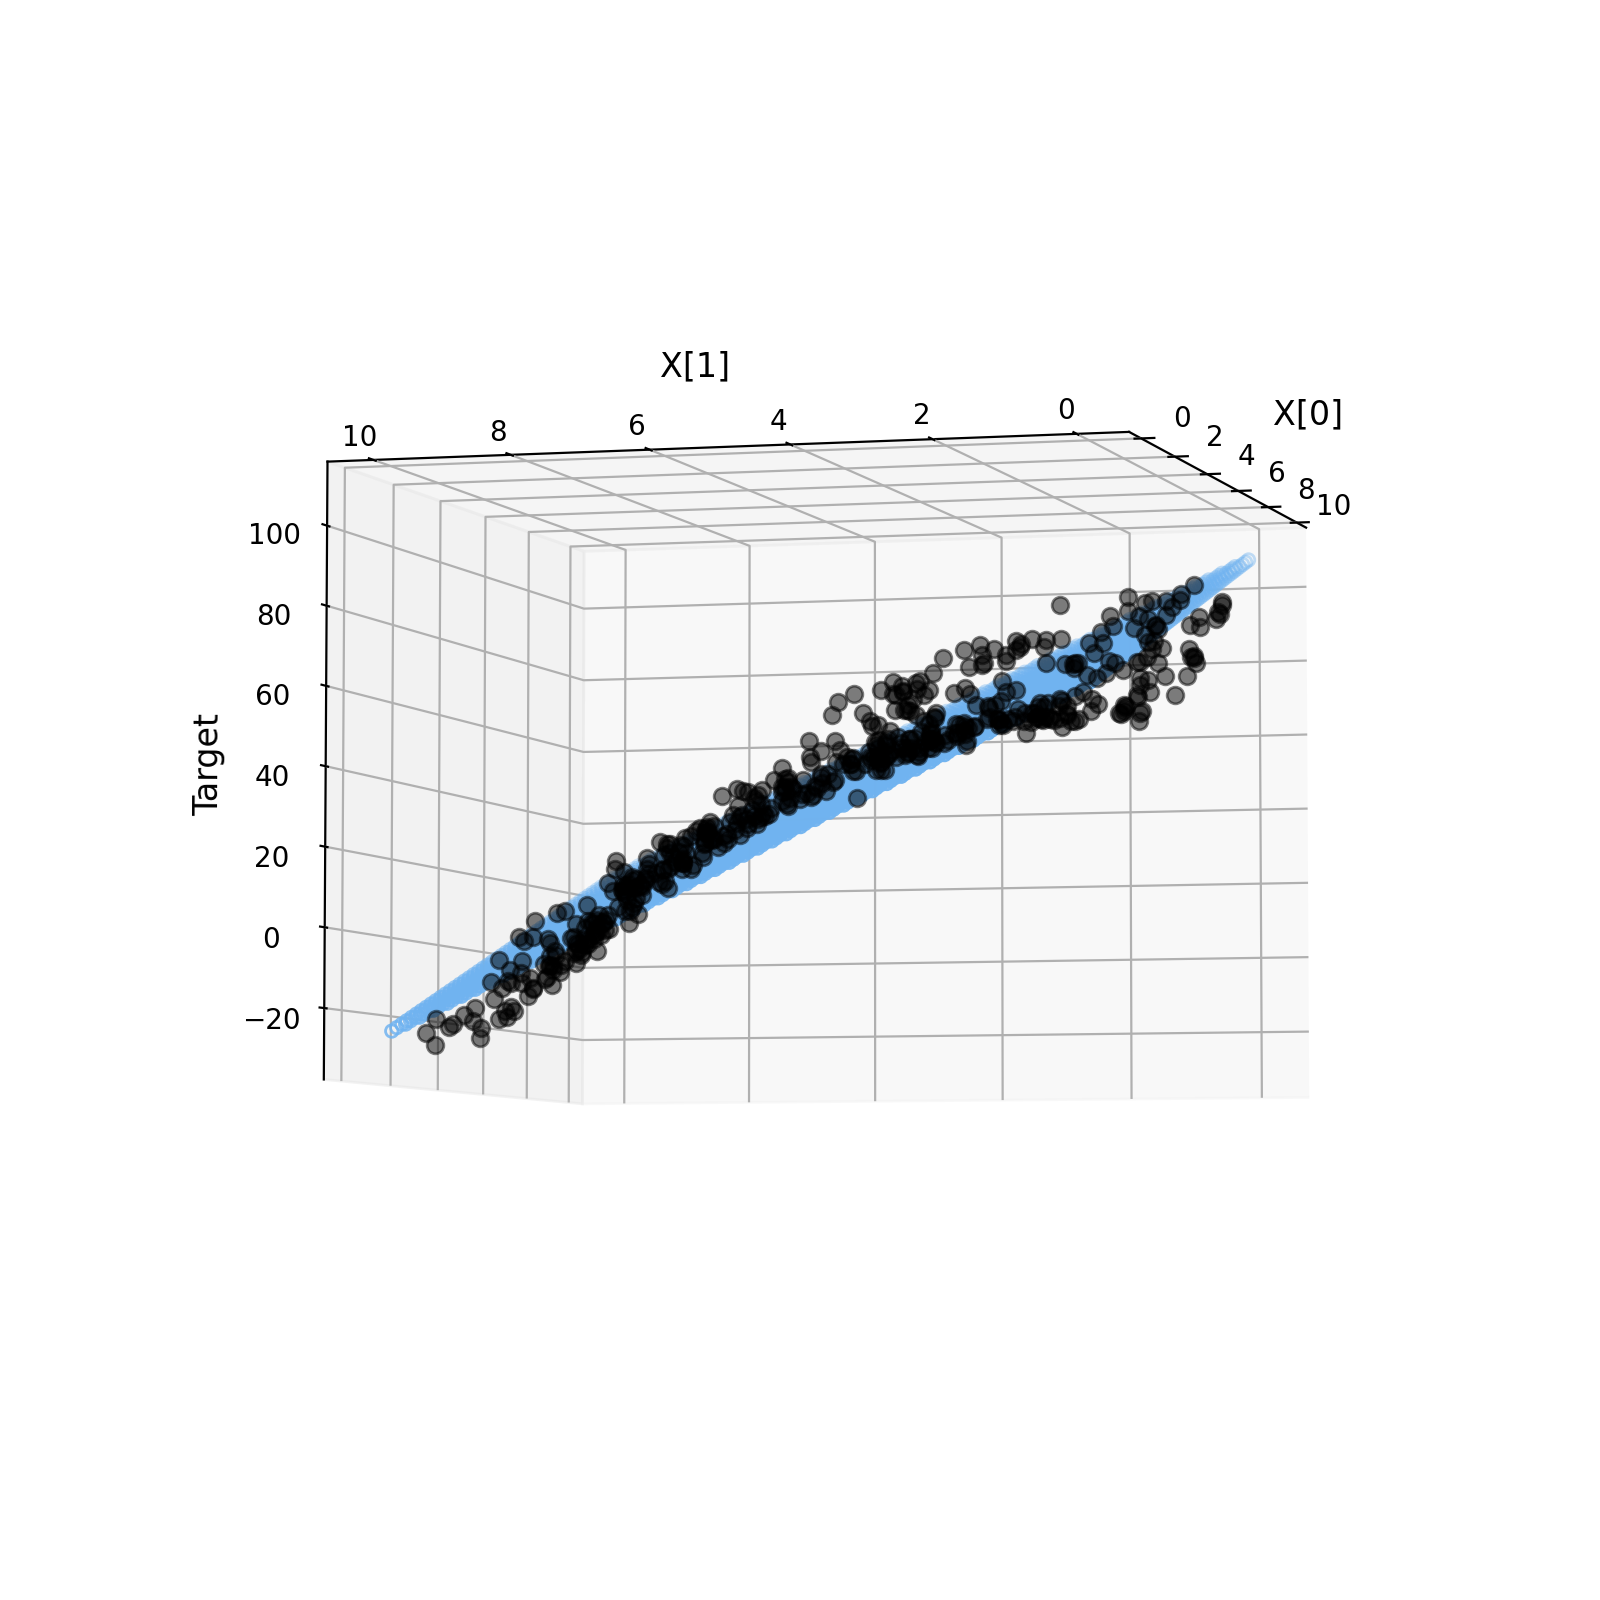

In [270]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), ridge_ypred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [271]:
# To turn off interactive plotting
%matplotlib inline

In [272]:
#CLD importing RidgeCV
from sklearn.linear_model import RidgeCV

In [273]:
#CLD fitting for best params using ridgecv
ridgecv = RidgeCV()
ridgecv.fit(X,y,sample_weight=1/yerr**2)
print(ridgecv.alpha_)

1.0


The CV alpha from RidgeCV does agree with the alpha found from GridSearchCV.

### Part 5

In [274]:
#CLD importing the correct model
from astroML.linear_model import NadarayaWatson

In [275]:
nw = NadarayaWatson(kernel='gaussian', h=0.2)
nw.fit(X,y,yerr)
nw_ypred = nw.predict(Xgrid)

<IPython.core.display.Javascript object>


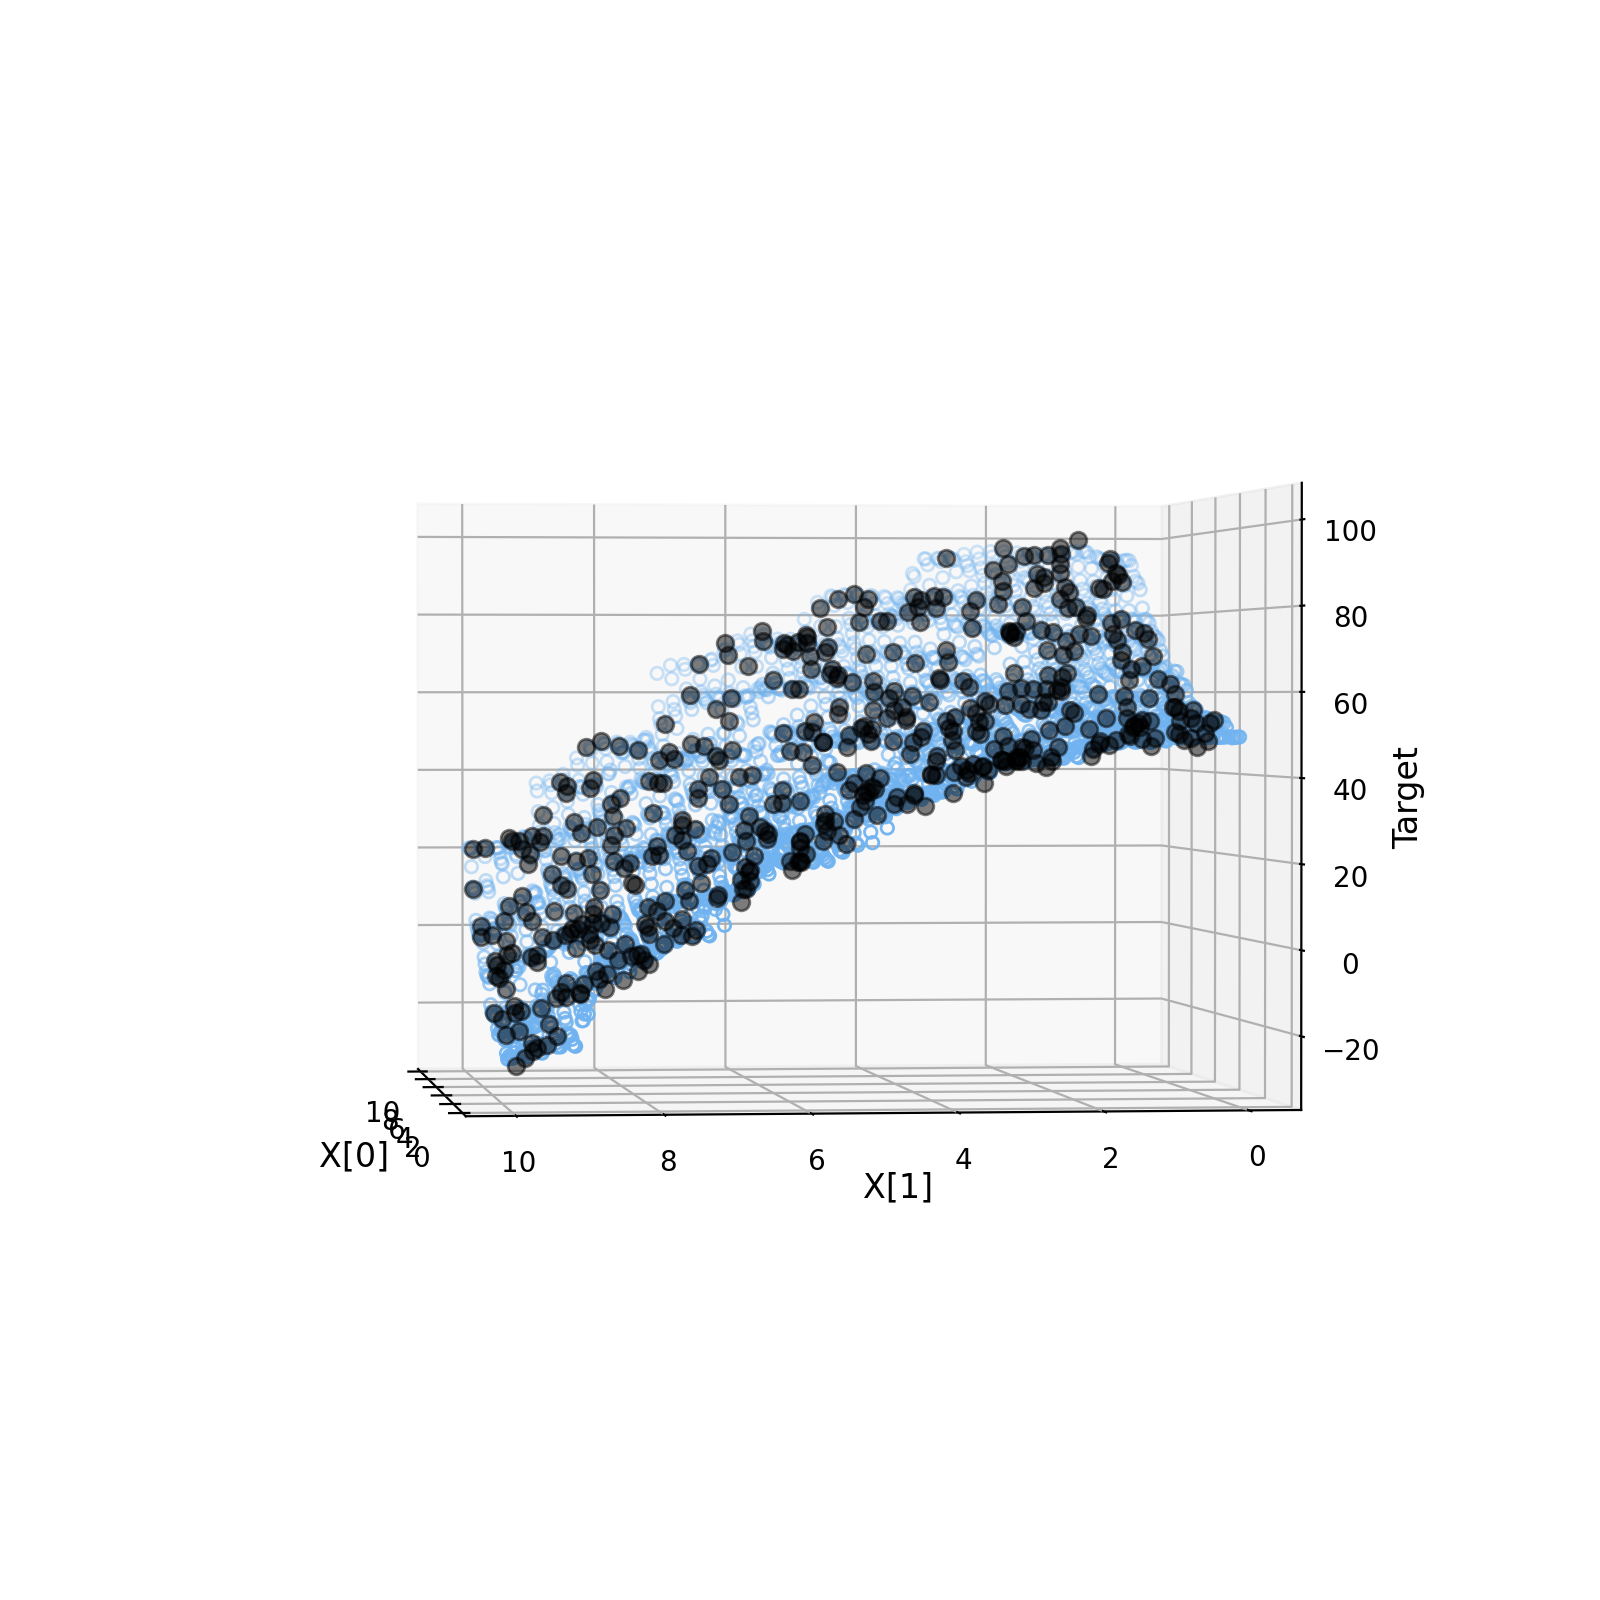

In [276]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), nw_ypred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [277]:
# To turn off interactive plotting
%matplotlib inline

This fit is definitely more wiggly than the other two which were more linear. In some ways, I think it captures the behavior of the data better, or at least the pringle shape of the data.

### Part 6

In [110]:
#CLD import the GPR
from sklearn.gaussian_process import GaussianProcessRegressor

In [111]:
#CLD setting up the models using the default kernel and not/accounting for errors
gpr_wo_err = GaussianProcessRegressor()
gpr_w_err = GaussianProcessRegressor(alpha=(yerr/y)**2)

In [278]:
#CLD doing the fits on the data 
gpr_wo_err.fit(X,y)
gpr_w_err.fit(X,y)

#CLD predicting the values
wo_err_ypred = gpr_wo_err.predict(Xgrid)
w_err_ypred = gpr_w_err.predict(Xgrid)

<IPython.core.display.Javascript object>


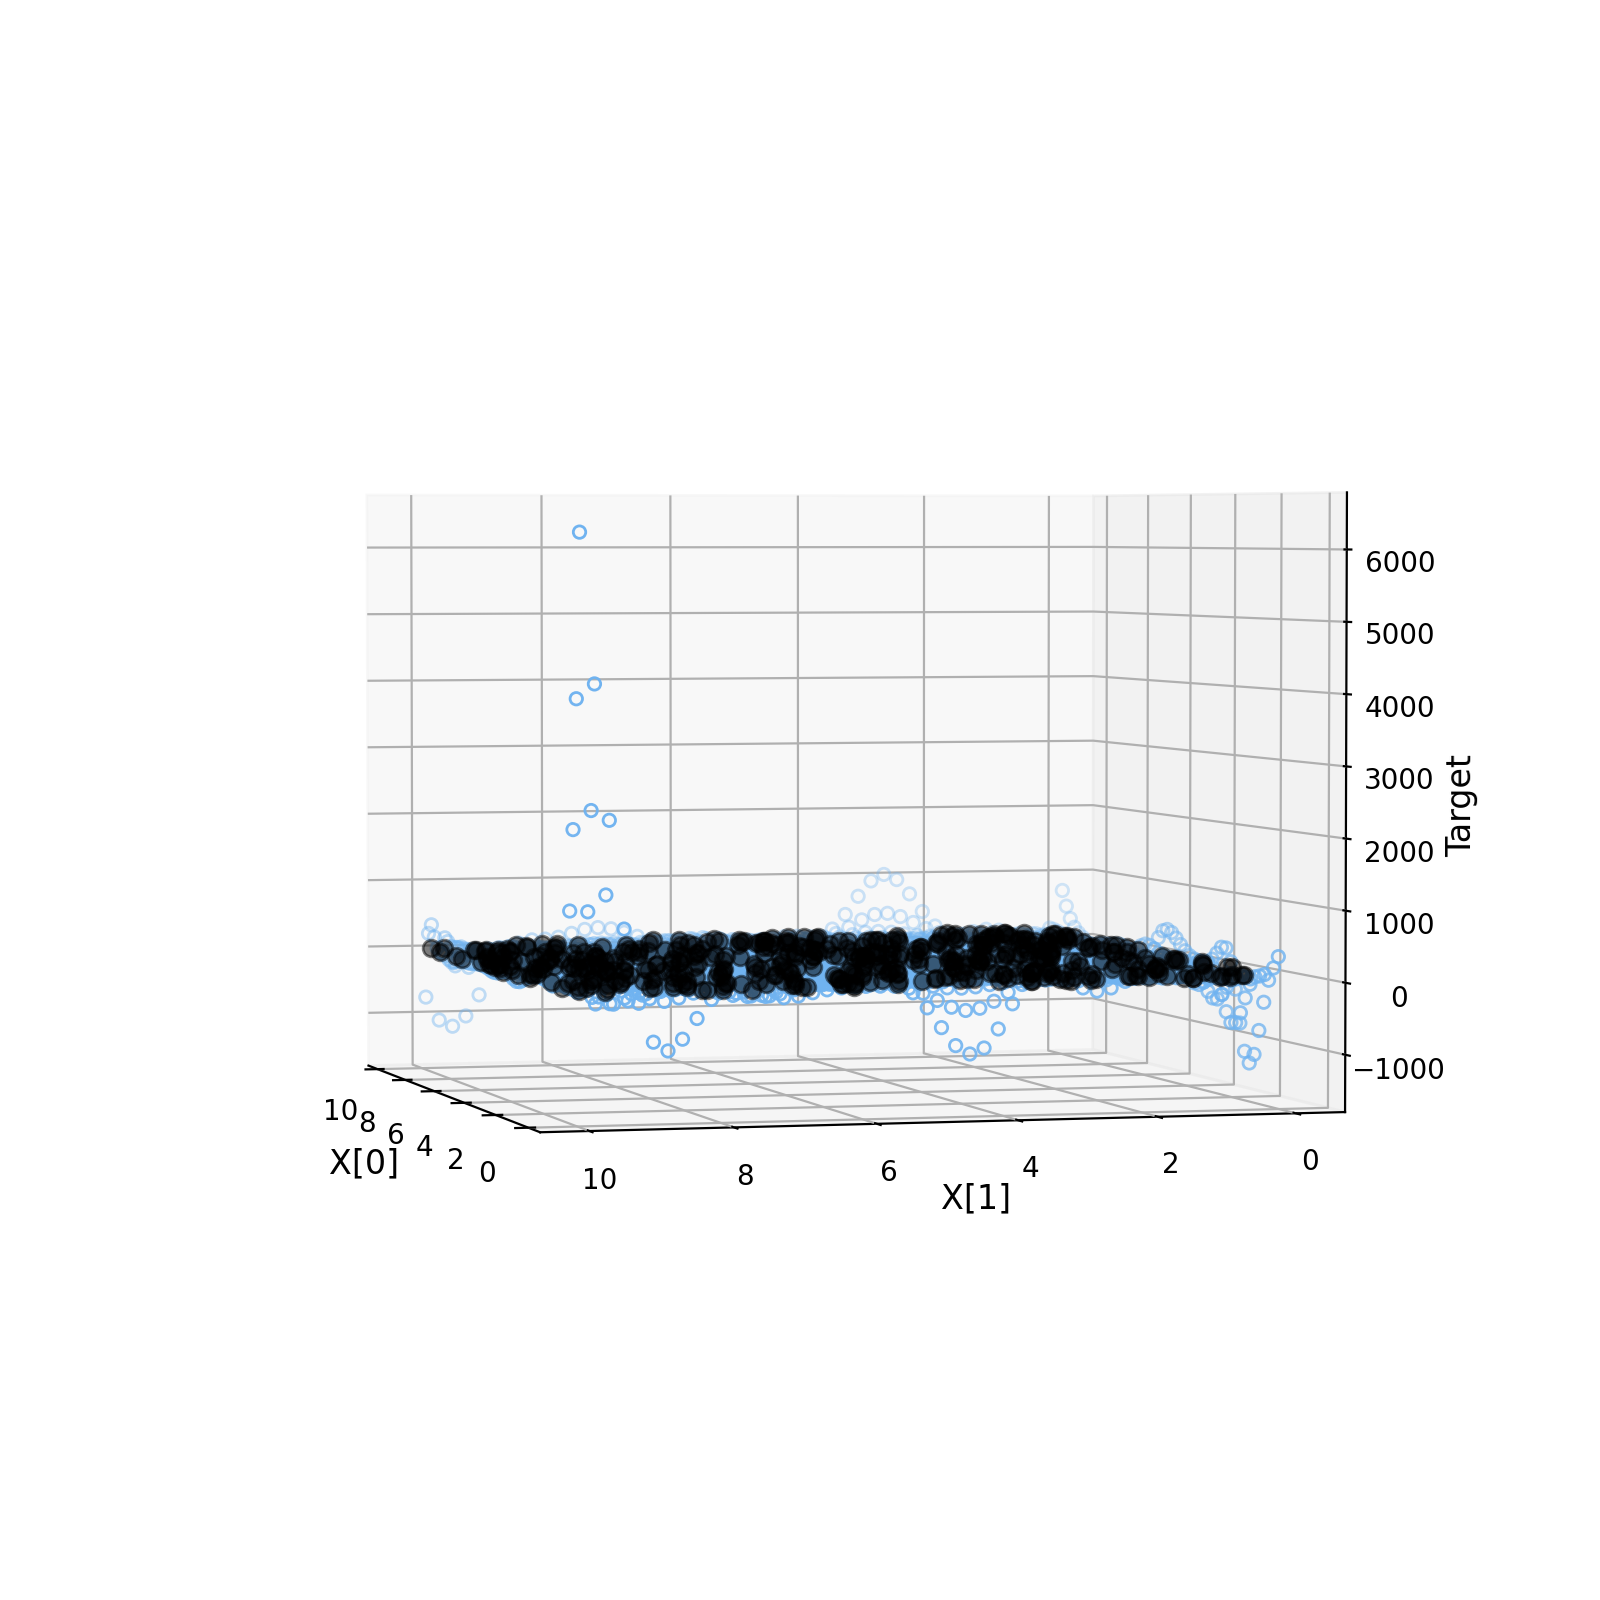

In [279]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), wo_err_ypred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [280]:
# To turn off interactive plotting
%matplotlib inline

<IPython.core.display.Javascript object>


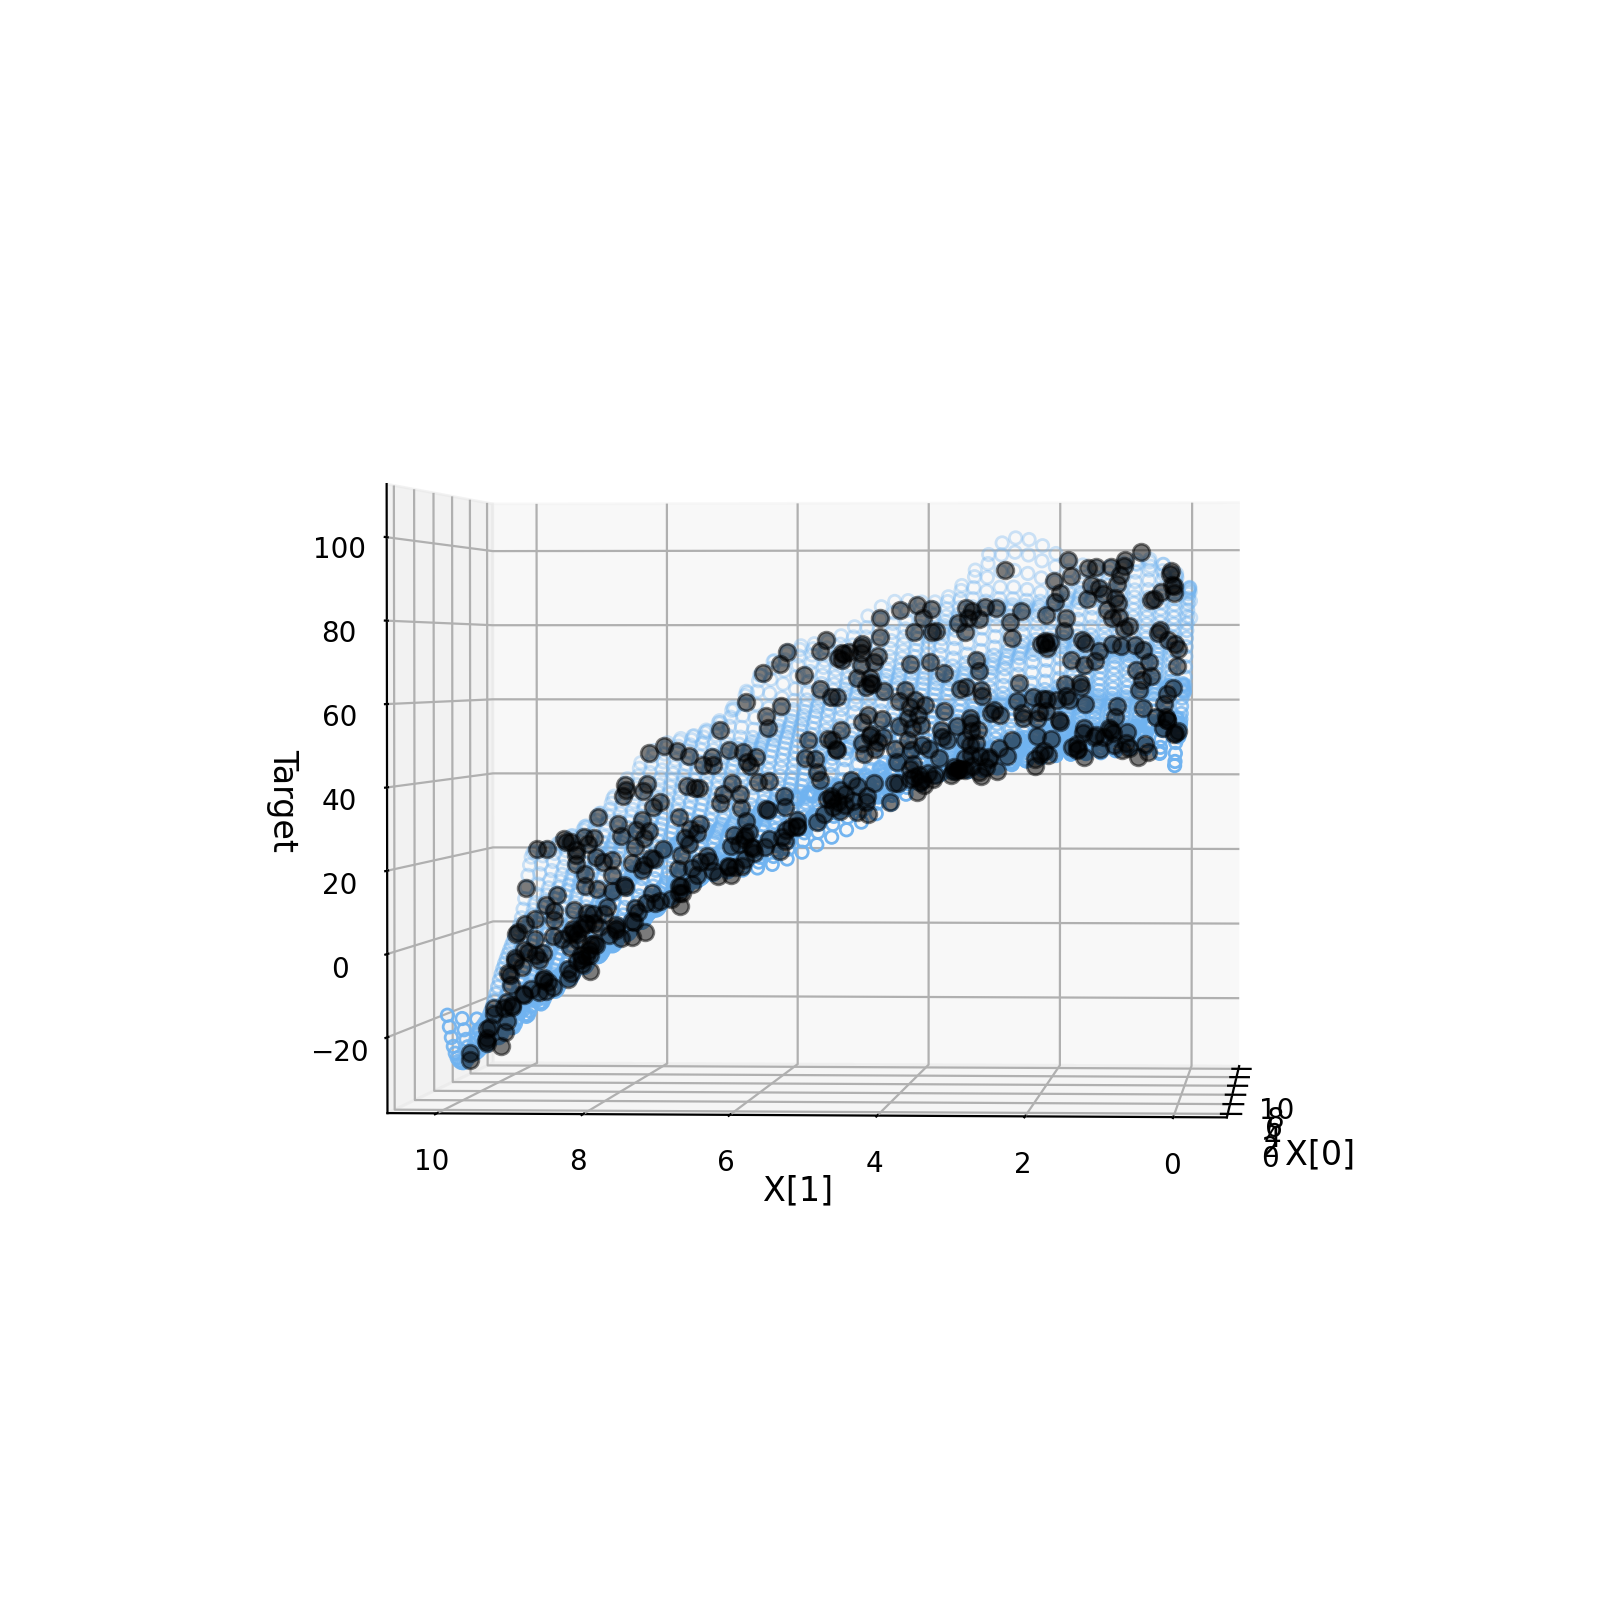

In [281]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), w_err_ypred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [282]:
# To turn off interactive plotting
%matplotlib inline

When you don't account for errors, the edge of the fit from this model is super off/goes to extremes. However, when you account for errors this model does a pretty good job of fitting the data, however there is still some noticeablly not great places at the edges.

### Part 7

In [150]:
#CLD importing the correct model
from astroML.linear_model import PolynomialRegression

In [156]:
#CLD fitting the model to our data
p4 = PolynomialRegression(degree=4)
p4.fit(X,y,yerr)
print(p4.coef_)

[ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842380e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


In [283]:
#CLD prediticting the values 
p4_ypred = p4.predict(Xgrid)

<IPython.core.display.Javascript object>


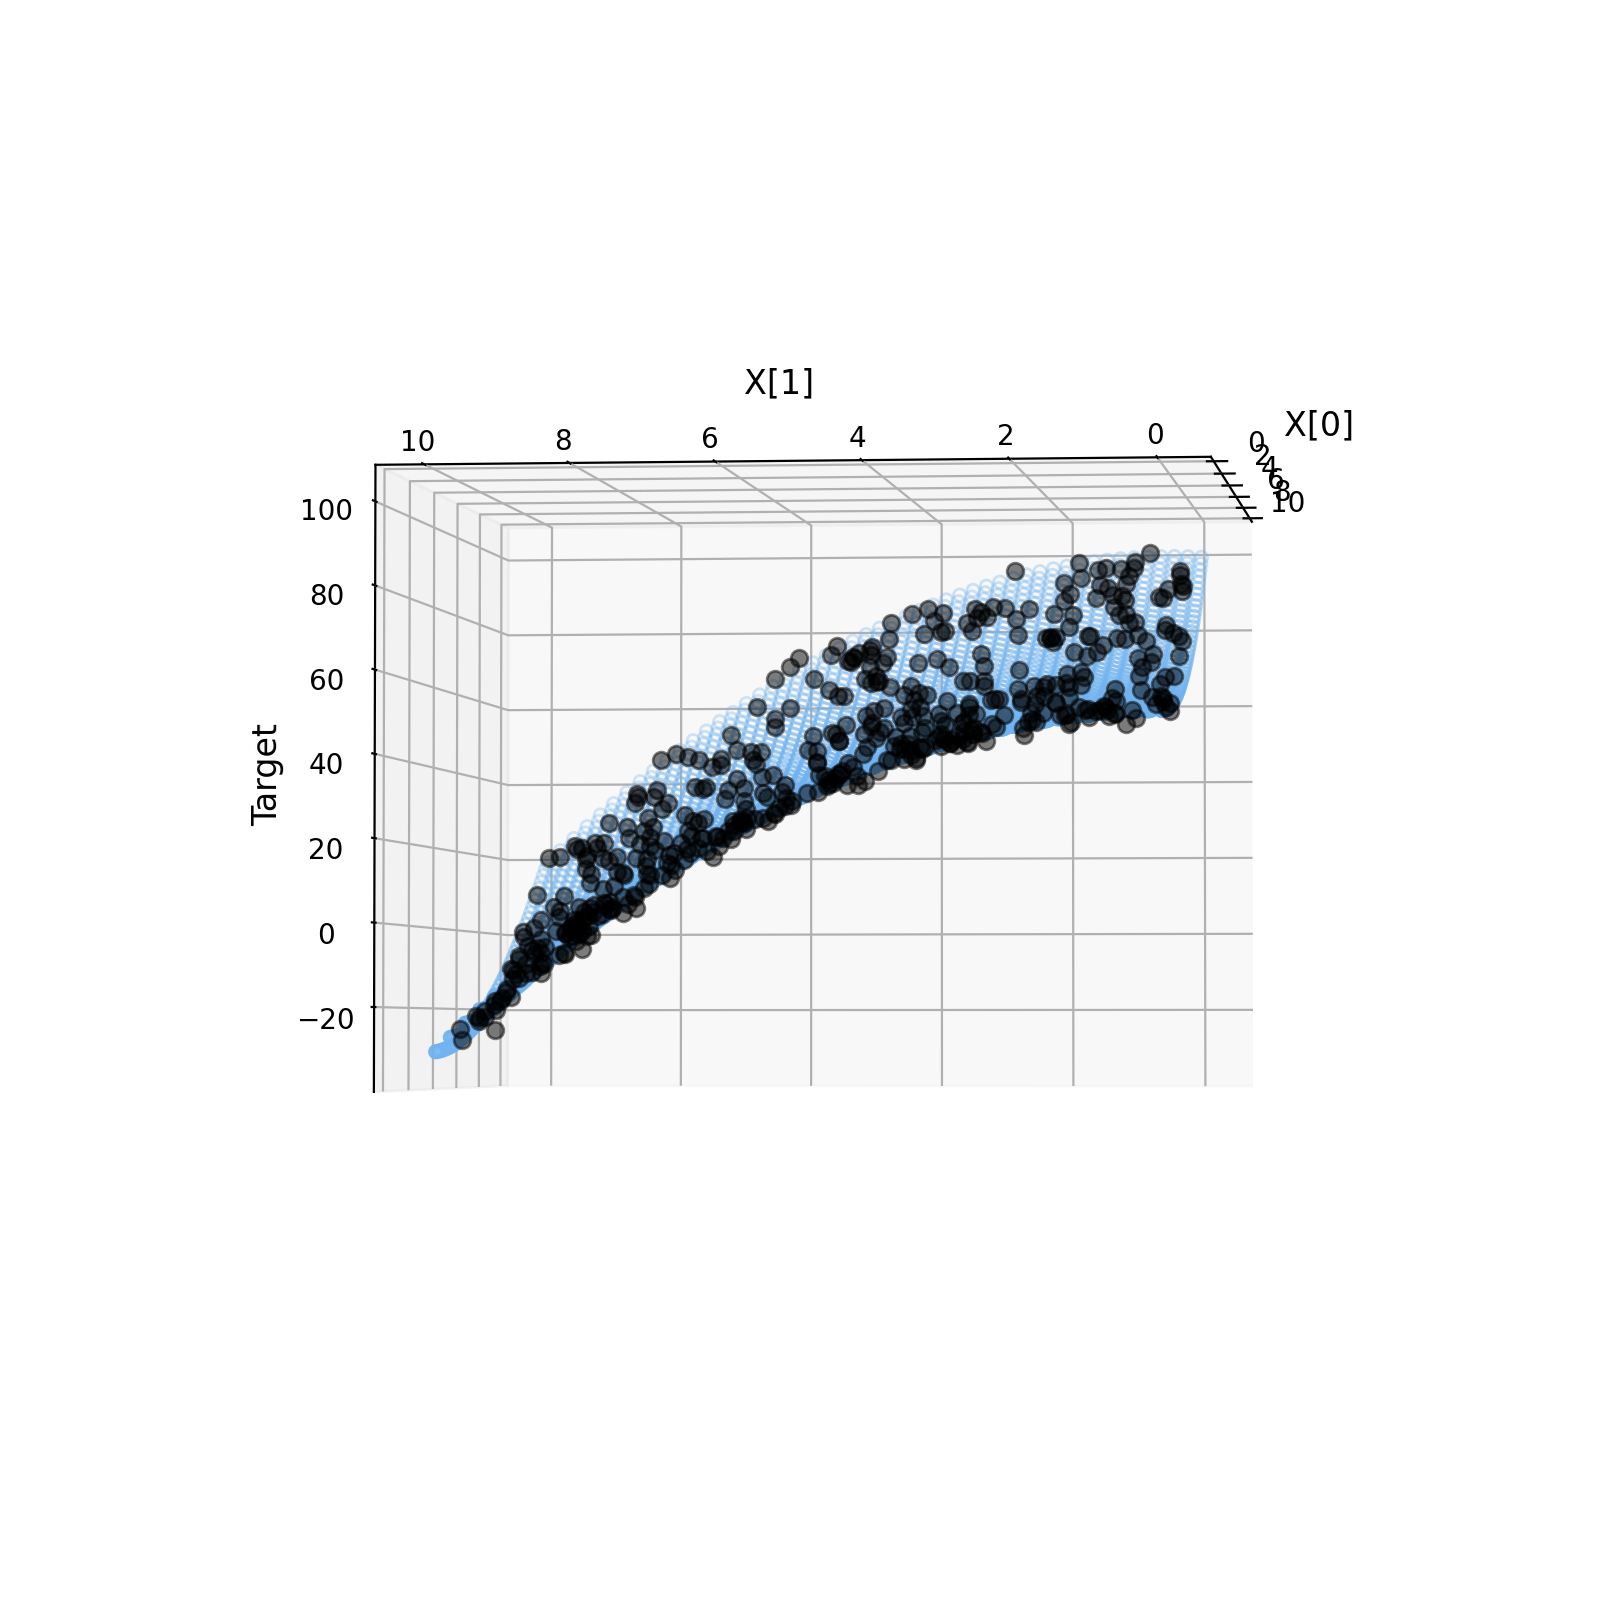

In [284]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), p4_ypred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [285]:
# To turn off interactive plotting
%matplotlib inline

To me, this looks like possibly the best fit so far. It's not overly wobbly, but captures the curved nature of the plane the best.

### Part 8

In [159]:
#CLD importing the neccesary funcitons
from sklearn.model_selection import train_test_split

In [294]:
#CLD doing the first split for train and test
placeholder = train_test_split(X,y, yerr, test_size=0.2)

In [295]:
train_X = placeholder[0]
test_X = placeholder[1]
train_y = placeholder[2]
test_y = placeholder[3]
train_yerr = placeholder[4]
test_yerr = placeholder[5]

In [296]:
#CLD doing a second split on train to get cv subset
placeholder = train_test_split(train_X, train_y, train_yerr, test_size=0.2)

In [297]:
train_X2 = placeholder[0]
cv_X = placeholder[1]
train_y2 = placeholder[2]
cv_y = placeholder[3]
train_yerr2 = placeholder[4]
cv_yerr = placeholder[5]

In [309]:
#CLD setting up degree array
degrees = np.array([1,2,3,4,5,6,7,8,9,10])

#CLD computing the training and cv errors in a similar way as in the notebook
training_err = np.zeros(len(degrees))
crossval_err = np.zeros(len(degrees))
BIC_train = np.zeros(len(degrees))
BIC_cv = np.zeros(len(degrees))
for i in range(len(degrees)):
    p = PolynomialRegression(degrees[i])
    p.fit(train_X2, train_y2, train_yerr2)
    
    training_err[i] = np.sqrt(np.sum((p.predict(train_X2) - train_y2) ** 2) / len(train_y2))
    crossval_err[i] = np.sqrt(np.sum((p.predict(cv_X)- cv_y) ** 2) / len(cv_y))
    
    #CLD from the notebook Lecture 17, the BIC is the training error multiplied by the sqrt(N) and divided by the
    #CLD error. As the errors are different before they are summed together, I have to calculate the BIC in the loop
    #CLD I reversed engineered what chi^2 would be from the notebook, namely sqrt(y_fit)
    BIC_train[i] = np.sqrt(np.sum((p.predict(train_X2)- train_y2) ** 2/ train_yerr2**2)) + degrees[i]*np.log(len(train_X2))
    BIC_cv[i] = np.sqrt(np.sum((p.predict(cv_X)- cv_y) ** 2 / cv_yerr**2)) + degrees[i]*np.log(len(cv_X))

#CLD calcing the BIC values
#BIC_train = training_err + (degrees+1)*np.log(len(train_X2))
#BIC_cv = crossval_err + (degrees+1)*np.log(len(cv_X))


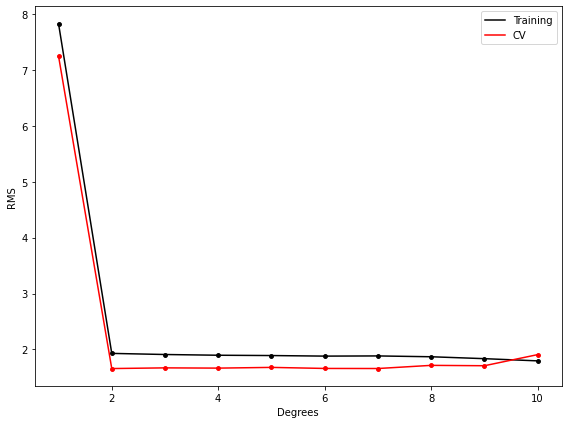

In [310]:
#CLD plotting the RMS
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(degrees, training_err, c='k', label='Training')
ax.scatter(degrees, training_err, c='k', s=15)
ax.plot(degrees, crossval_err, c='r', label='CV')
ax.scatter(degrees, crossval_err, c='r', s=15)
ax.legend()
ax.set_xlabel('Degrees')
ax.set_ylabel('RMS')
fig.tight_layout()
plt.show(fig)

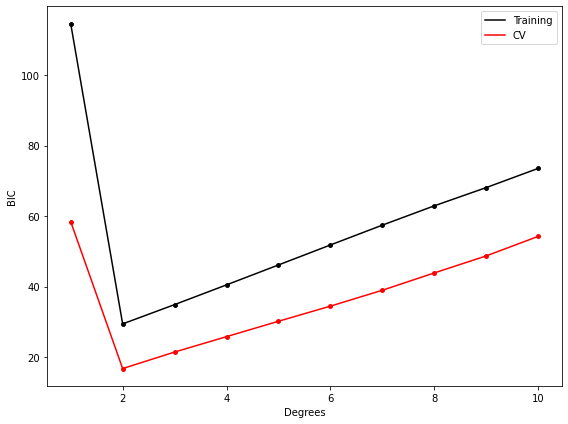

In [311]:
#CLD plotting the BIC
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(degrees, BIC_train, c='k', label='Training')
ax.scatter(degrees, BIC_train, c='k', s=15)
ax.plot(degrees, BIC_cv, c='r', label='CV')
ax.scatter(degrees, BIC_cv, c='r', s=15)
ax.legend()
ax.set_xlabel('Degrees')
ax.set_ylabel('BIC')
fig.tight_layout()
plt.show(fig)

From the graphs above, it appears that a fit of degree=2 should be the best.

In [302]:
#CLD training a polynomial regression model of degree=2 on the first set of training data
p2 = PolynomialRegression(degree=2)
p2.fit(train_X, train_y, train_yerr)

#CLD predicting the labels of the test set
p2_yfit = p2.predict(test_X)

#CLD calcing the RMS error of the test data
test_err = np.sqrt(np.sum((p2_yfit - test_y) ** 2) / len(test_y))

print('The RMS error of the test data is: %0.2f' %test_err)

The RMS error of the test data is: 2.07
